In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys, os
sys.path.append('..')

import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV

from get_data import get_data, get_splitted_data
from models.active_model import ActiveLearningExperiment
from models.strategy import *
from models.utils import ObstructedY

from misc.config import c
data_dir = c["DATA_DIR"]

In [ ]:
seed = 666
strategy_args = {'batch_size': 10, 'seed': seed}
comp = [['5ht7', 'ExtFP']]
loader = ["get_splitted_data",
          {"n_folds": 2,
           "seed":666,
           "test_size":0.0}]
preprocess_fncs = []

sgd = SGDClassifier(random_state=seed, alpha=1)
model = ActiveModel(strategy=random_query, base_model=sgd)

folds, test_data, data_desc = get_data(comp, loader, preprocess_fncs).values()[0]
print data_desc
X = folds[0]['X_train']
y = ObstructedY(folds[0]['Y_train'])

X_test = folds[0]['X_valid']
y_test = folds[0]['Y_valid']
model.fit(X, y, strategy_args=strategy_args)
p = model.predict(X_test)
accuracy_score(p, y_test)

In [ ]:
seed = 666
strategy_args = {'batch_size': 10, 'method': 'simple', 'seed': seed}
comp = [['5ht7', 'ExtFP']]
loader = ["get_splitted_data",
          {"n_folds": 2,
           "seed":666,
           "test_size":0.0}]
preprocess_fncs = []

folds, test_data, data_desc = get_data(comp, loader, preprocess_fncs).values()[0]
print data_desc
X = folds[0]['X_train']
y = ObstructedY(folds[0]['Y_train'])

X_test = folds[0]['X_valid']
y_test = folds[0]['Y_valid']
svm = SVC(C=0.01, kernel='linear')
sgd = SGDClassifier(random_state=seed, alpha=1)
model = ActiveModel(strategy=uncertainty_sampling, base_model=svm)

model.fit(X, y, strategy_args=strategy_args)
p = model.predict(X_test)
accuracy_score(p, y_test)

In [ ]:
from sklearn.svm import SVC

X = folds[0]['X_train']
y = ObstructedY(folds[0]['Y_train'])

X_test = folds[0]['X_valid']
y_test = folds[0]['Y_valid']

svm = SVC(C=0.01, kernel='linear', probability=True)

seed = 666
strategy_args = {'batch_size': 10, 'seed': seed, 'method': 'entropy'}
comp = [['5ht7', 'ExtFP']]
loader = ["get_splitted_data",
          {"n_folds": 2,
           "seed":666,
           "test_size":0.0}]
preprocess_fncs = []

model = ActiveModel(strategy=uncertainty_sampling, base_model=svm)
model.fit(X, y, strategy_args=strategy_args)
p = model.predict(X_test)
accuracy_score(p, y_test)

In [ ]:
X = folds[0]['X_train']
y = ObstructedY(folds[0]['Y_train'])

X_test = folds[0]['X_valid']
y_test = folds[0]['Y_valid']

svm = SVC(C=0.01, kernel='linear')

seed = 666
strategy_args = {'batch_size': 10, 'seed': seed, 'method': 'entropy', 'n_bags': 5}
comp = [['5ht7', 'ExtFP']]
loader = ["get_splitted_data",
          {"n_folds": 2,
           "seed":666,
           "test_size":0.0}]
preprocess_fncs = []

model = ActiveModel(strategy=query_by_bagging, base_model=svm)
model.fit(X, y, strategy_args=strategy_args)
p = model.predict(X_test)
accuracy_score(p, y_test)

In [ ]:
X = folds[0]['X_train']
y = ObstructedY(folds[0]['Y_train'])

X_test = folds[0]['X_valid']
y_test = folds[0]['Y_valid']

svm = SVC(C=0.01, kernel='linear', probability=True)

seed = 666
strategy_args = {'batch_size': 10, 'seed': seed, 'method': 'KL', 'n_bags': 5}
comp = [['5ht7', 'ExtFP']]
loader = ["get_splitted_data",
          {"n_folds": 2,
           "seed":666,
           "test_size":0.0}]
preprocess_fncs = []

model = ActiveModel(strategy=query_by_bagging, base_model=svm)
model.fit(X, y, strategy_args=strategy_args)
p = model.predict(X_test)
accuracy_score(p, y_test)

In [ ]:
p = np.array([clf.predict_proba(X_test) for clf in bc.estimators_])

In [ ]:
print p.shape
(p / pc).shape

In [ ]:
a = np.arange(6).reshape(3,2)
b = 2 * np.ones(6).reshape(3,2)
a/b

In [ ]:
np.mean(np.sum(p * np.log(p / pc), axis=2), axis=0).shape

In [ ]:
a = np.arange(10)
a[-2:]

In [6]:
from sklearn.base import BaseEstimator
class Dummy(BaseEstimator):
    
    def __init__(self):
        pass
    
    def fit(self, X,y):
        pass
    
    def predict(self, X):
        return np.zeros(X.shape[0])
    
    def predict_proba(self, X):
        return (X[:,0] / np.max(X,axis=0)[0]).reshape(-1,1)
    
    def decision_function(self, X):
        return (X[:,0] / np.max(X,axis=0)[0]).reshape(-1,)

In [ ]:
X.reshape(-1,1)

In [12]:
m = Dummy()
X = np.linspace(0.6,1,20).reshape(-1,1)
y = ObstructedY(np.ones(X.shape[0]))
print m.predict_proba(X)

[[ 0.6       ]
 [ 0.62105263]
 [ 0.64210526]
 [ 0.66315789]
 [ 0.68421053]
 [ 0.70526316]
 [ 0.72631579]
 [ 0.74736842]
 [ 0.76842105]
 [ 0.78947368]
 [ 0.81052632]
 [ 0.83157895]
 [ 0.85263158]
 [ 0.87368421]
 [ 0.89473684]
 [ 0.91578947]
 [ 0.93684211]
 [ 0.95789474]
 [ 0.97894737]
 [ 1.        ]]


In [13]:
uncertainty_sampling(X[::-1], y, m, 3, 'entropy')

array([19, 18, 17])

In [15]:
uncertainty_sampling(X[::-1], y, m, 3, 'simple')

array([19, 18, 17])

In [ ]:
a = np.arange(100).reshape(5,20)
a.shape

In [ ]:
from sklearn.ensemble import BaggingClassifier

sgd = SGDClassifier(random_state=seed, alpha=1)
bc = BaggingClassifier(sgd)

In [ ]:
bc.partial_fit(X)

In [17]:
y = np.ones(10)
y[[3,6,9]] = -1
y

array([ 1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.])

In [19]:
mask = y == -1
mask

array([False, False, False,  True, False, False,  True, False, False,  True], dtype=bool)

In [21]:
X = np.arange(10)

In [23]:
np.where(mask == True)[0]

array([3, 6, 9])

In [47]:
mean_1 = np.array([-2, 0])
mean_2 = np.array([2, 0])
cov = np.array([[1, 0], [0, 1]])
X_1 = np.random.multivariate_normal(mean_1, cov, 100)
X_2 = np.random.multivariate_normal(mean_2, cov, 200)
print X_1.shape
print X_2.shape

X = np.vstack([X_1, X_2])
print X.shape

y = np.ones(X.shape[0])
y[101:] = -1
print y.shape

(100, 2)
(200, 2)
(300, 2)
(300,)


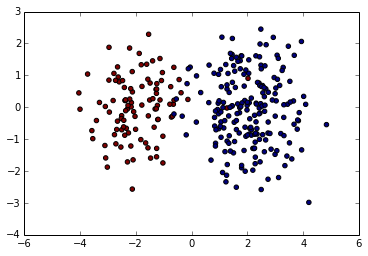

In [48]:
plt.scatter(X[:,0], X[:,1], c=y)

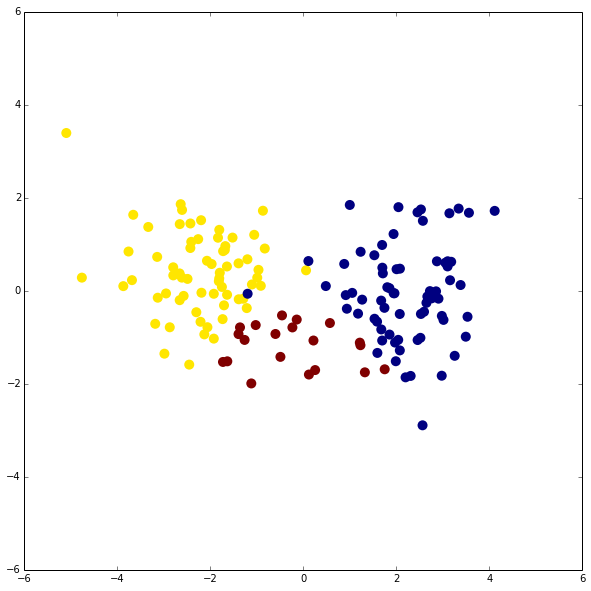

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
np.random.seed(666)
mean_1 = np.array([-2, 0])
mean_2 = np.array([2, 0])
cov = np.array([[1, 0], [0, 1]])
X_1 = np.random.multivariate_normal(mean_1, cov, 100)
X_2 = np.random.multivariate_normal(mean_2, cov, 100)
X = np.vstack([X_1, X_2])
y = np.ones(X.shape[0])
y[101:] = -1

# shuffle data
p = np.random.permutation(X.shape[0])
X = X[p]
y = y[p]

y = ObstructedY(y)
y.query(np.random.randint(0, X.shape[0], 50))

model = SVC(C=1, kernel='linear', probability=True)

pick = query_by_bagging(X, y, model, batch_size=20, seed=666, n_bags=10, method='KL')

not_picked = [i for i in xrange(X.shape[0]) if i not in set(pick)]

y_plot = y._y
y_plot[pick] = 2
plt.figure(figsize=(10,10))
plt.scatter(X[y.unknown_ids, 0], X[y.unknown_ids, 1], c=y_plot[y.unknown_ids], s=100, linewidths=0)
plt.ylim(-6,6)
plt.show()

In [ ]:
from get_data import get_data, get_splitted_data
from models.active_model import ActiveLearningExperiment
from models.strategy import *
from models.utils import ObstructedY
from functools import partial
from sklearn.base import clone

from misc.config import c
data_dir = c["DATA_DIR"]

seed = 666
comp = [['5ht7', 'ExtFP']]
loader = ["get_splitted_data",
          {"n_folds": 2,
           "seed": seed,
           "test_size": 0.0}]
preprocess_fncs = []

folds, test_data, data_desc = get_data(comp, loader, preprocess_fncs).values()[0]
print data_desc

X = folds[0]['X_train']
y = ObstructedY(folds[0]['Y_train'])

X_test = folds[0]['X_valid']
y_test = folds[0]['Y_valid']

print X.shape
print y._y.shape

print X_test.shape
print y_test.shape

base_model = SVC(C=1, kernel='linear', probability=True)
strategy = partial(query_by_bagging, base_model=clone(base_model), n_bags=10, method='KL')

print isinstance(y, ObstructedY)

model = ActiveLearningExperiment(strategy, base_model, batch_size=10)
model.fit(X, y, X_test, y_test)
print model.monitors

In [8]:
from get_data import get_data, get_splitted_data
from models.active_model import ActiveLearningExperiment
from models.strategy import *
from models.utils import ObstructedY
from functools import partial
from sklearn.base import clone

from misc.config import c
data_dir = c["DATA_DIR"]

seed = 666
comp = [['5ht7', 'ExtFP']]
loader = ["get_splitted_data",
          {"n_folds": 2,
           "seed": seed,
           "test_size": 0.0}]
preprocess_fncs = []

folds, test_data, data_desc = get_data(comp, loader, preprocess_fncs).values()[0]
print data_desc

X = folds[0]['X_train']
y = ObstructedY(folds[0]['Y_train'])

X_test = folds[0]['X_valid']
y_test = folds[0]['Y_valid']

{'preprocess': [], 'loader': ['get_splitted_data', {'n_folds': 2, 'test_size': 0.0, 'fingerprint': 'ExtFP', 'seed': 666, 'compound': '5ht7'}]}


In [9]:
a = np.arange(10)

[autoreload of models.strategy failed: Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "../models/strategy.py", line 74
    d_score =
            ^
SyntaxError: invalid syntax
]


In [14]:
from itertools import product
print [x for x in product(a, a)]


[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


In [16]:
a = np.array([True, False, True])
np.where(a == True)

(array([0, 2]),)

In [4]:
np.logspace(-5,5,10)

array([  1.00000000e-05,   1.29154967e-04,   1.66810054e-03,
         2.15443469e-02,   2.78255940e-01,   3.59381366e+00,
         4.64158883e+01,   5.99484250e+02,   7.74263683e+03,
         1.00000000e+05])